<a href="https://colab.research.google.com/github/Vinay-Yadav01/Deep-Learning/blob/main/My_Multi_Class_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Drop unnecessary columns
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Create Multi-class target: Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=[0, 1, 2, 3, 4]).astype(int)

# Drop 'Age' and original target
df.drop(['Age', 'Survived'], axis=1, inplace=True)

# Features and labels
X = df.drop('AgeGroup', axis=1)
y = df['AgeGroup']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-1-38dd38bf1a48>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-38dd38bf1a48>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

Softmax Regression Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.00      0.00      0.00        17
           2       0.64      0.93      0.76       102
           3       0.35      0.20      0.25        41
           4       0.00      0.00      0.00         8

    accuracy                           0.59       179
   macro avg       0.27      0.28      0.27       179
weighted avg       0.47      0.59      0.51       179

Confusion Matrix:


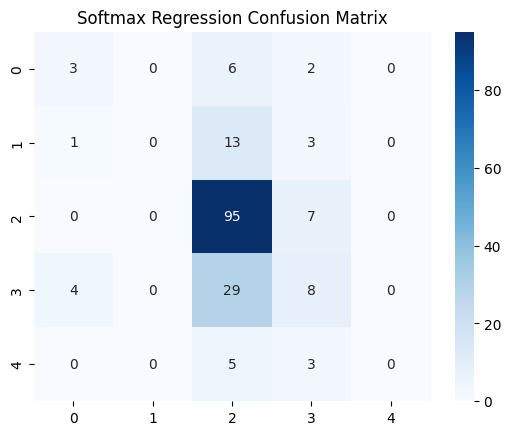

In [2]:
# Train multinomial logistic regression
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
softmax_model.fit(X_train, y_train)

# Predict
y_pred_softmax = softmax_model.predict(X_test)

# Evaluation
print("Softmax Regression Classification Report:")
print(classification_report(y_test, y_pred_softmax))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_softmax), annot=True, fmt='d', cmap='Blues')
plt.title("Softmax Regression Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       1.00      0.06      0.11        17
           2       0.63      0.83      0.72       102
           3       0.33      0.27      0.30        41
           4       0.00      0.00      0.00         8

    accuracy                           0.58       179
   macro avg       0.53      0.34      0.35       179
weighted avg       0.57      0.58      0.52       179

Confusion Matrix:


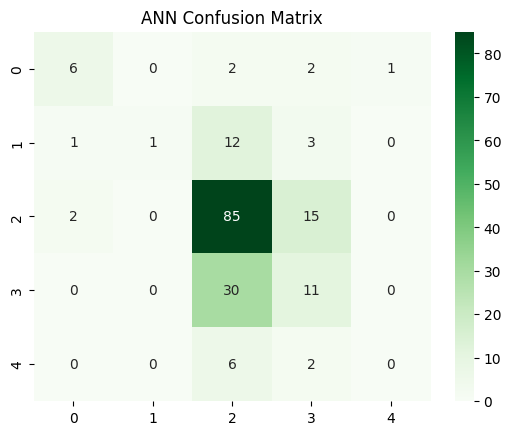

In [3]:
# Build ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 age groups
])

# Compile model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)

# Evaluation
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Greens')
plt.title("ANN Confusion Matrix")
plt.show()
